<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [47]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [48]:
# Load the data
house = pd.read_csv('./housing.csv')

### ** Creating and inspecting the dataframe. ** ###

In [49]:
# A:
ames_train_df = pd.DataFrame(house)
ames_train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [50]:
ames_test_df = ames_train_df.drop('SalePrice', axis=1)
ames_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [51]:
ames_train_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


('Skew is:', 1.8828757597682129)


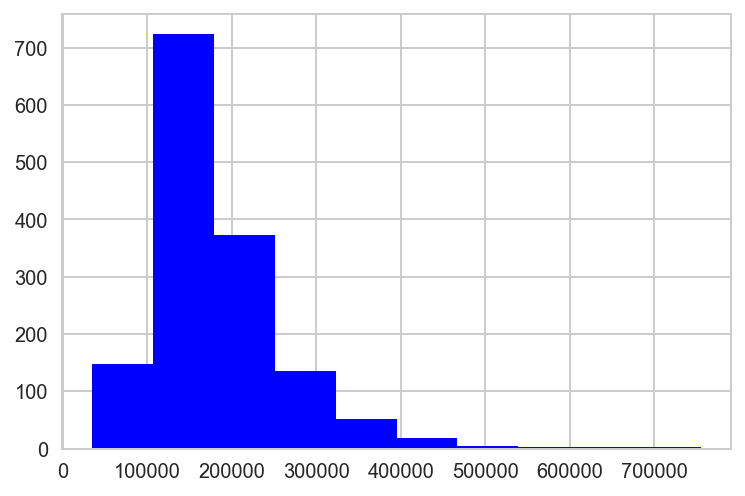

In [52]:
print ("Skew is:", ames_train_df.SalePrice.skew())
plt.hist(ames_train_df.SalePrice, color='blue')
plt.show()

('Skew is:', 0.12133506220520406)


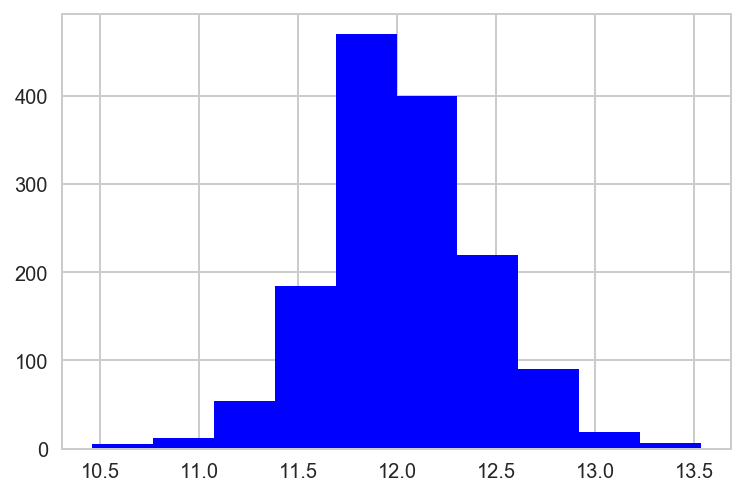

In [53]:
target = np.log(ames_train_df.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### ** Using a log function seriously diminished the skew. ** ###

In [54]:
num_feat = ames_train_df.select_dtypes(include=[np.number])
num_feat.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### ** A correlation test. ** ###

In [55]:
corr = num_feat.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

(SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64, '\n')
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [56]:
ames_train_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [57]:
qual_pvt = ames_train_df.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
qual_pvt

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

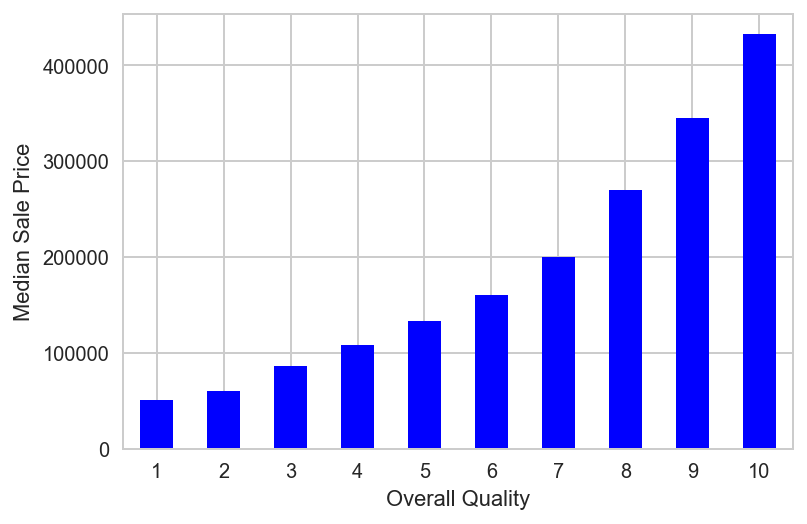

In [58]:
qual_pvt.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### ** Looking into the ground level surface area. ** ###

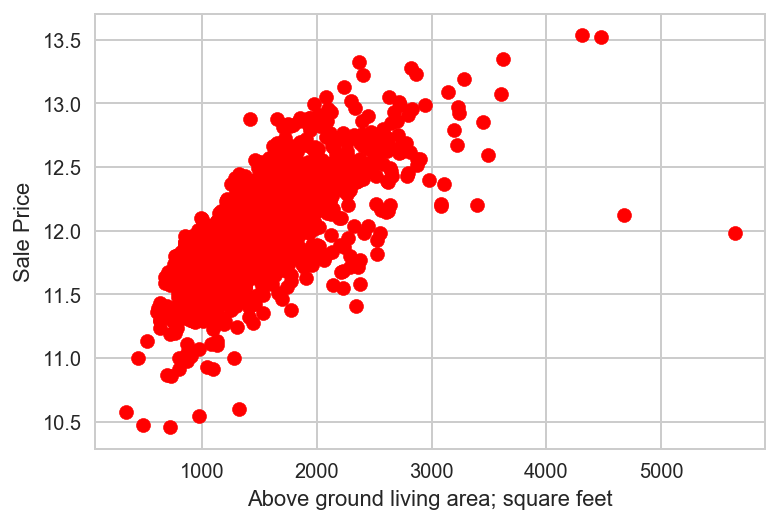

In [59]:
plt.scatter(x=ames_train_df['GrLivArea'], y=target, color='red')
plt.ylabel('Sale Price')
plt.xlabel('Above ground living area; square feet')
plt.show()

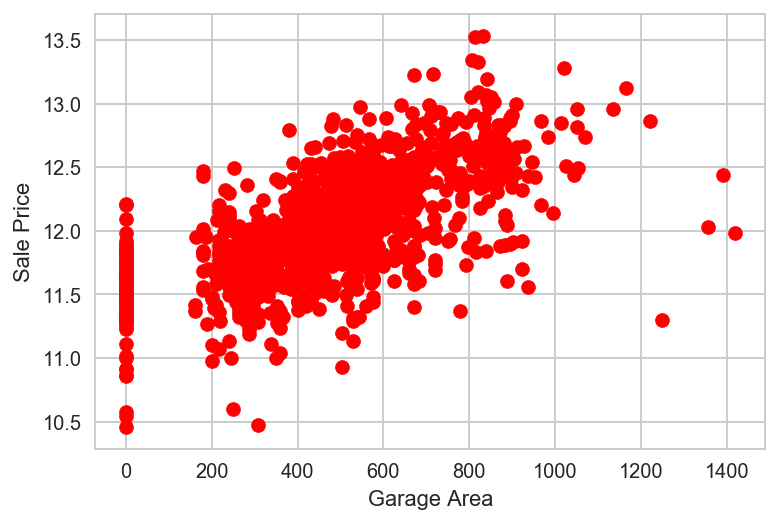

In [60]:
plt.scatter(x=ames_train_df['GarageArea'], y=target, color='red')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

### ** Removal of the outliers. ** ###

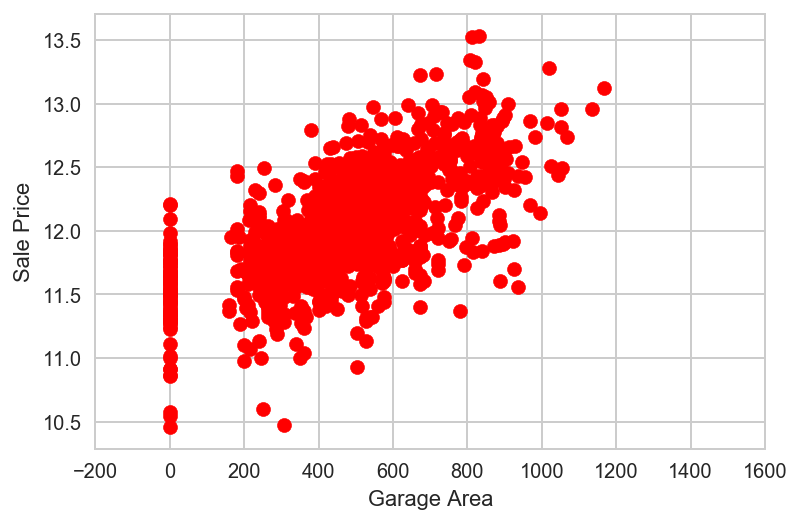

In [61]:
ames_train_df = ames_train_df[ames_train_df['GarageArea'] < 1200]

plt.scatter(x=ames_train_df['GarageArea'], y=np.log(ames_train_df.SalePrice), color='red')
plt.xlim(-200,1600) 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

### ** A check of the null counts; ** ###

In [62]:
nulls = pd.DataFrame(ames_train_df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [63]:
print "Unique values are:", ames_train_df.MiscFeature.unique()

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [64]:
cats = ames_train_df.select_dtypes(exclude=[np.number])
cats.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


### ** Let's drop the five non-paved streets by encoding. ** ###

In [65]:
ames_train_df['enc_street'] = pd.get_dummies(ames_train_df.Street, drop_first=True)
ames_test_df['enc_street'] = pd.get_dummies(ames_train_df.Street, drop_first=True)
print ('Encoded: \n') 
print (ames_train_df.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
ames_train_df.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'], dtype=object)

C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


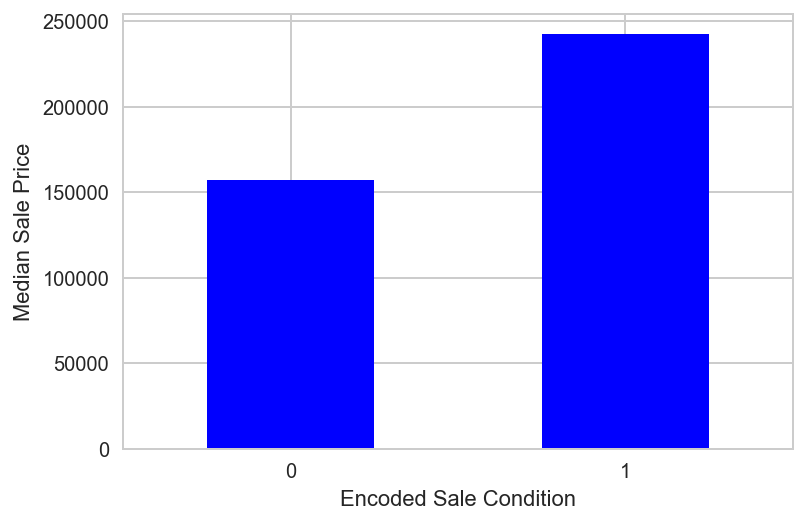

In [67]:
def encode(x): return 1 if x == 'Partial' else 0
ames_train_df['enc_condition'] = ames_train_df.SaleCondition.apply(encode)
ames_test_df['enc_condition'] = ames_test_df.SaleCondition.apply(encode)



condition_pivot = ames_train_df.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### ** The encoding shows that houses with a 'Partial' sale condition-- net new sales-- sold at a significantly higher median price. ** ###

In [68]:
data = ames_train_df.select_dtypes(include=[np.number]).interpolate().dropna() 
sum(data.isnull().sum() != 0)

0

In [69]:
y = np.log(ames_train_df.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print "R^2 is:", model.score(X_test, y_test)

R^2 is: 0.888247770926


In [71]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print 'RMSE is', mean_squared_error(y_test, predictions)

RMSE is 0.0178417945196


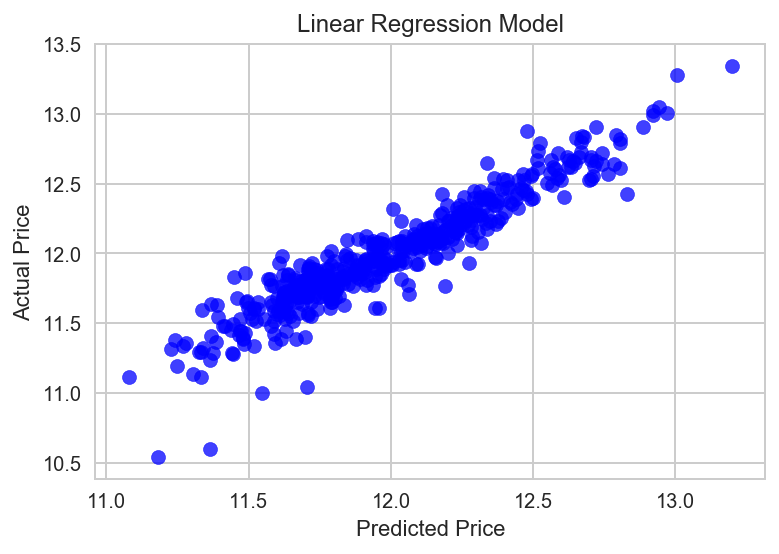

In [72]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

### ** The linear regression model looks good. Now for a ridge regression with varying alphas. ** ###

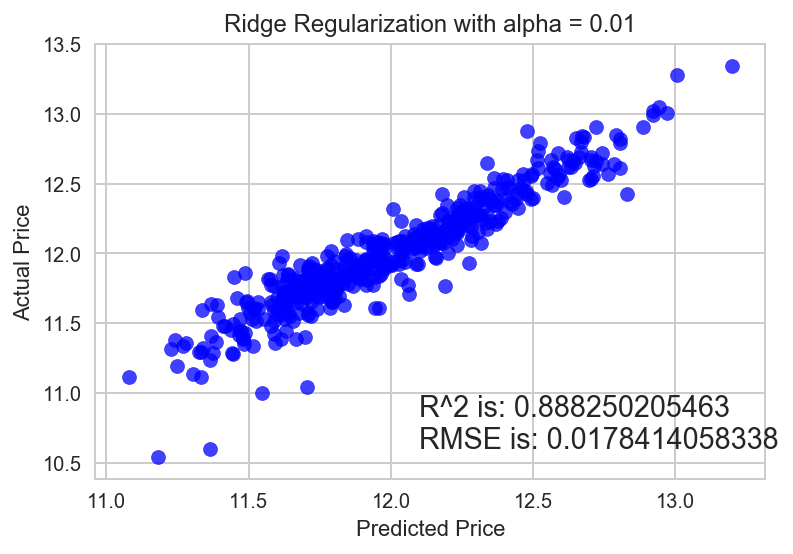

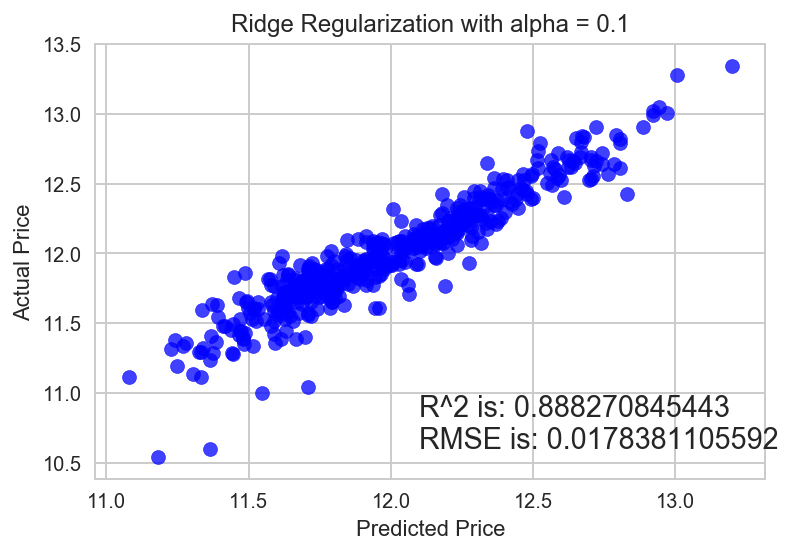

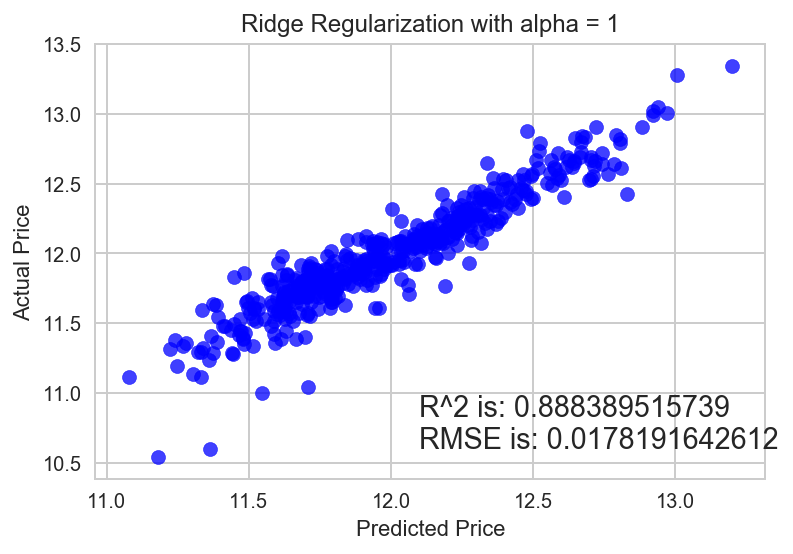

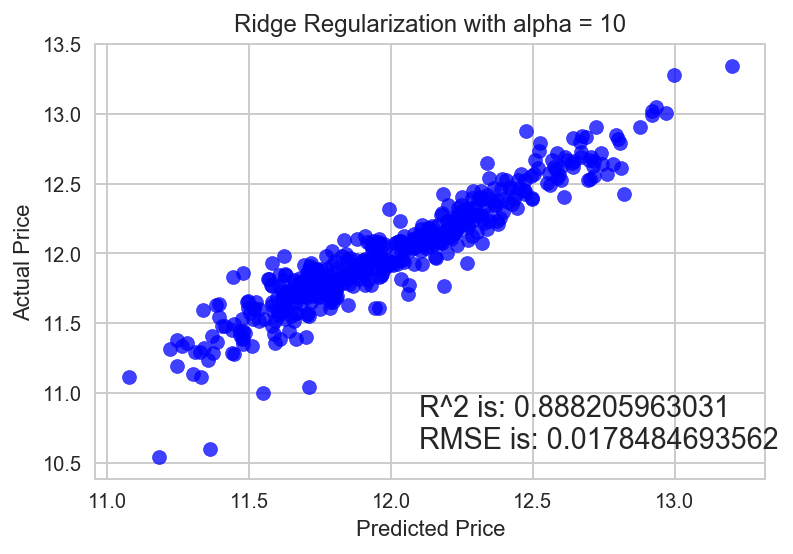

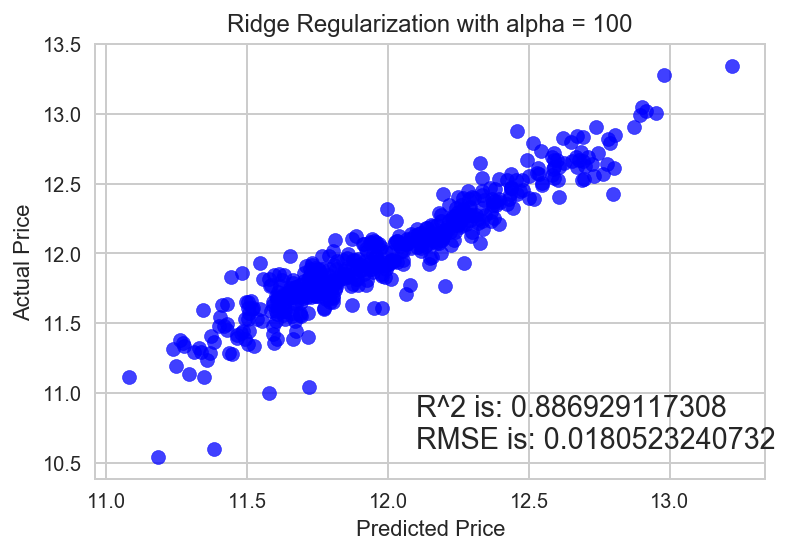

In [73]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

### ** This all looks good. I think having alpha/lambda at 1 is the strongest fit. ** ###

In [74]:
remod_pvt = ames_train_df.pivot_table(index='YearRemodAdd',
                                  values='SalePrice', aggfunc=np.median)
remod_pvt

YearRemodAdd
1950    115000
1951    138450
1952    123500
1953    152250
1954    118500
1955    130000
1956    128950
1957    141000
1958    136000
1959    137716
1960    149775
1961    132750
1962    143950
1963    137500
1964    167000
1965    137000
1966    154000
1967    125250
1968    142000
1969    151500
1970    129250
1971    117250
1972    127750
1973    135000
1974    165000
1975    170000
1976    151450
1977    160000
1978    152750
1979    139456
         ...  
1981    173250
1982    134900
1983    134000
1984    187500
1985    160000
1986    184000
1987    178950
1988    196500
1989    180000
1990    180000
1991    179550
1992    170000
1993    187000
1994    207750
1995    156000
1996    168250
1997    204750
1998    195700
1999    188500
2000    173000
2001    205000
2002    215750
2003    184900
2004    181550
2005    192000
2006    212900
2007    205475
2008    263316
2009    238885
2010    331966
Name: SalePrice, dtype: int64

In [75]:
ames_train_df.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


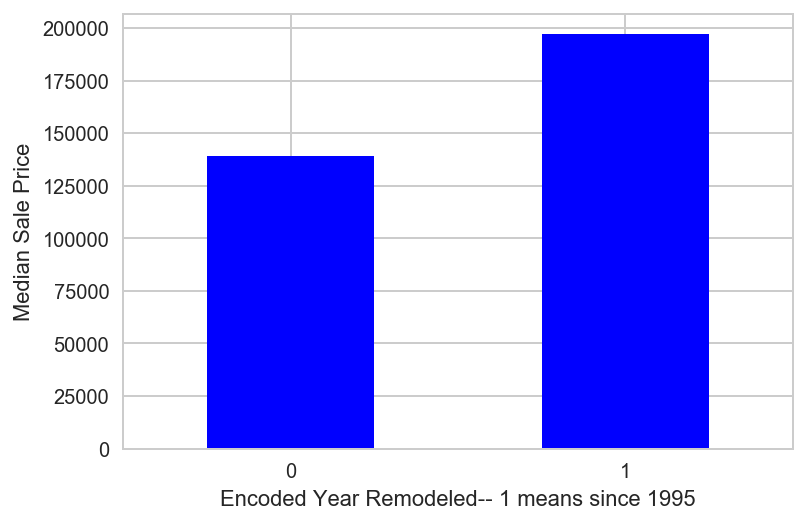

In [76]:

def encode_remod(x): return 1 if x >= 1995 else 0
ames_train_df['enc_remod'] = ames_train_df.YearRemodAdd.apply(encode_remod)
ames_test_df['enc_remod'] = ames_test_df.YearRemodAdd.apply(encode_remod)

remod_pivot = ames_train_df.pivot_table(index='enc_remod', values='SalePrice', aggfunc=np.median)
remod_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Year Remodeled-- 1 means since 1995')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

('Skew is:', 0.05643797677771524)


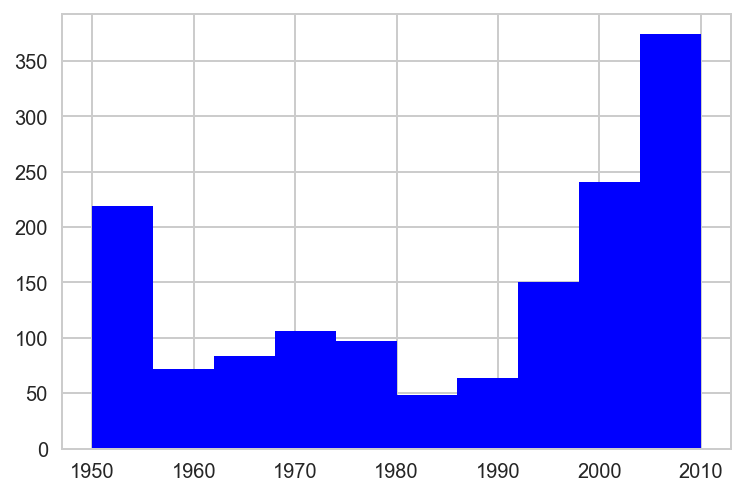

In [77]:
print ("Skew is:", ames_train_df.enc_remod.skew())
plt.hist(ames_train_df.YearRemodAdd, color='blue')
plt.show()

In [78]:
data_remod = ames_train_df.select_dtypes(include=[np.number]).interpolate().dropna() 
sum(data_remod.isnull().sum() != 0)
y_remod = np.log(ames_train_df.YearRemodAdd)
X_remod = data_remod.drop(['SalePrice', 'Id'], axis=1)

('Skew is:', 0.05643797677771524)


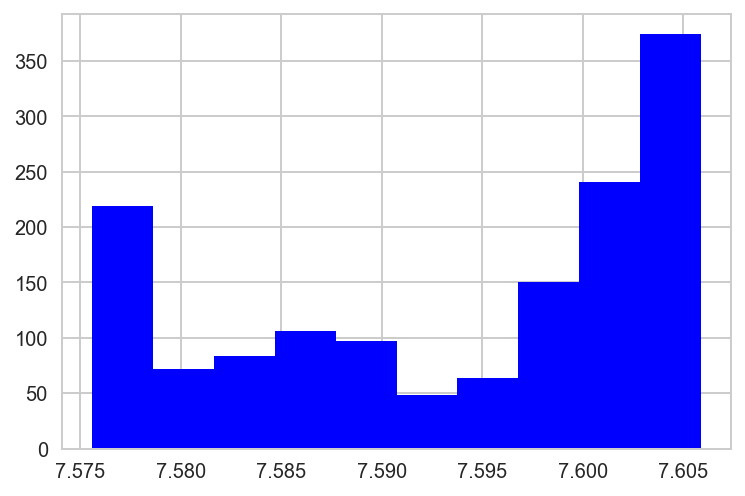

In [79]:
print ("Skew is:", ames_train_df.enc_remod.skew())
plt.hist(y_remod, color='blue')
plt.show()

### ** The skew was not removed by putting the remodel year through a log. Not sure if this was due to the whole number nature of the data. ** ###

In [80]:
X_train_remod, X_test_remod, y_train_remod, y_test_remod = train_test_split(X_remod, y_remod, test_size=.33)
lr = linear_model.LinearRegression()
model_remod = lr.fit(X_train_remod, y_train_remod)
print "R^2 is:", model_remod.score(X_test_remod, y_test_remod)

R^2 is: 0.999994631279


In [81]:
predictions_remod = model_remod.predict(X_test_remod)
print 'RMSE for YearRemodAdd is', mean_squared_error(y_test_remod, predictions)

RMSE for YearRemodAdd is 19.4800685366


### ** The R^2 value is high and the RMSE is low, so this looks good. ** ###

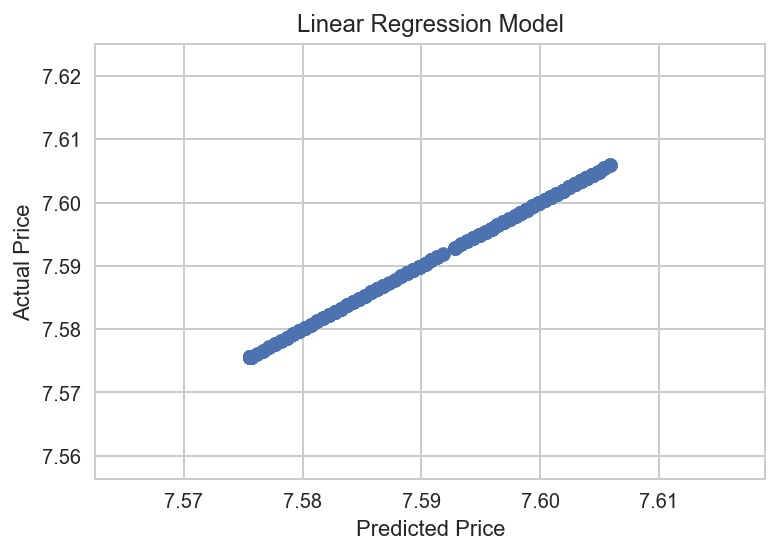

In [82]:

actual_values = y_test_remod
plt.scatter(predictions_remod, actual_values)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [83]:
#sns.lmplot(ames_train_df["enc_remod"], ames_train_df["SalePrice"], data=ames_train_df)


In [84]:
ames_train_df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enc_street,enc_condition,enc_remod
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,9,2009,WD,Normal,136000,1,0,0
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2009,New,Partial,287090,1,1,1
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2006,WD,Normal,145000,1,0,1
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,7,2006,WD,Abnorml,84500,1,0,1
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,NaN,0,10,2009,WD,Normal,185000,1,0,1
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,8,2007,WD,Normal,175000,1,0,1
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2010,WD,Normal,210000,1,0,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,1,0,1
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2010,WD,Normal,142125,1,0,1
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,6,2008,WD,Normal,147500,1,0,0


C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


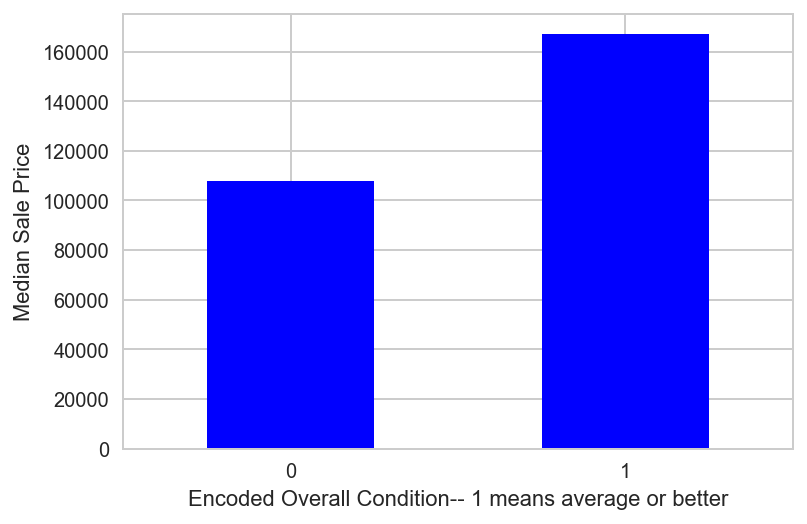

In [85]:
def encode(x): return 1 if x >= 5 else 0
ames_train_df['enc_ovrallcon'] = ames_train_df.OverallCond.apply(encode)
ames_test_df['enc_ovrallcon'] = ames_test_df.OverallCond.apply(encode)

ovrcon_pivot = ames_train_df.pivot_table(index='enc_ovrallcon', values='SalePrice', aggfunc=np.median)
ovrcon_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Overall Condition-- 1 means average or better')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [86]:
data_cond = ames_train_df.select_dtypes(include=[np.number]).interpolate().dropna() 
sum(data_cond.isnull().sum() != 0)
y_cond = np.log(ames_train_df.OverallCond)
X_cond = data.drop(['SalePrice', 'Id'], axis=1)

X_train_cond, X_test_cond, y_train_cond, y_test_cond = train_test_split(X_cond, y_cond, random_state=42, test_size=.33)
lr = linear_model.LinearRegression()
model_cond = lr.fit(X_train_cond, y_train_cond)
print "R^2 is:", model_cond.score(X_test_cond, y_test_cond)

R^2 is: 0.968387319655


In [87]:
predictions_cond = model_cond.predict(X_test_cond)
print 'RMSE is', mean_squared_error(y_test_cond, predictions_cond)

RMSE is 0.00120906053661


### ** The R^2 value is high and the RMSE is low, so this looks good. ** ###

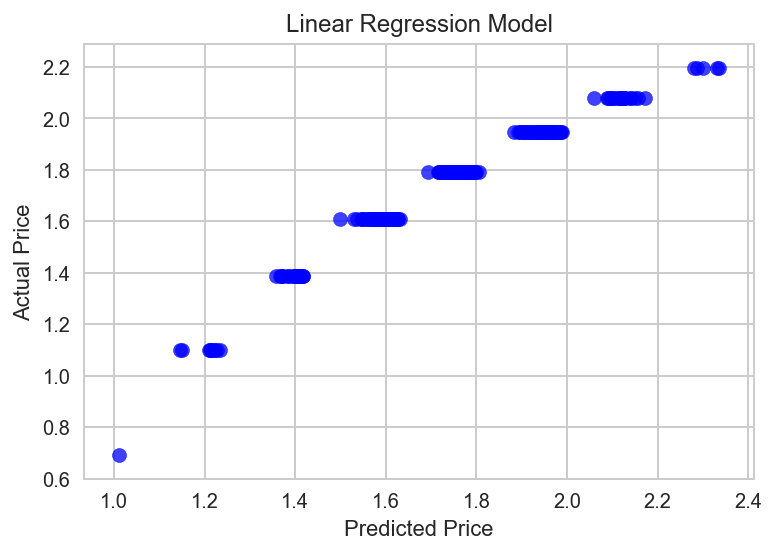

In [88]:
actual_values_cond = y_test_cond
plt.scatter(predictions_cond, actual_values_cond, alpha=.75,
            color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

### ** I ultimately wasn't satisfied with the results of the last 2 features regarding the Year of Remodel and the Overall Condition. I would have sought some guidance to analyze and correct this part of the model to find something satisfactory to pursue and continue the project. ** ###

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [89]:
# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [90]:
# A: